### 处理现金流归集表

#### 引入解析工具箱

In [185]:
from absbox.report_parser.china import *

从发行报告中把可怕的现金流归集表粘贴过来

In [186]:
r = '''归集日期 期初剩余本金 回收本金 回收利息 期末剩余本金
2024/2/29 4,500,001,047.85 224,053,881.53 4,793,572.11 4,275,947,166.32
2024/3/31 4,275,947,166.32 224,371,124.30 8,756,707.23 4,051,576,042.02
2024/4/30 4,051,576,042.02 224,593,099.27 8,437,800.01 3,826,982,942.75
2024/5/31 3,826,982,942.75 224,675,644.80 8,117,628.44 3,602,307,297.95
2024/6/30 3,602,307,297.95 224,782,519.51 7,796,819.43 3,377,524,778.44
2024/7/31 3,377,524,778.44 224,853,790.05 7,474,909.07 3,152,670,988.39
2024/8/31 3,152,670,988.39 225,037,373.80 7,152,615.30 2,927,633,614.59
2024/9/30 2,927,633,614.59 204,861,136.19 6,829,261.23 2,722,772,478.40
2024/10/31 2,722,772,478.40 183,623,456.87 6,544,089.27 2,539,149,021.53
2024/11/30 2,539,149,021.53 165,158,145.90 6,297,520.59 2,373,990,875.63
2024/12/31 2,373,990,875.63 165,280,964.01 6,085,006.84 2,208,709,911.62
2025/1/31 2,208,709,911.62 165,344,301.09 5,871,663.54 2,043,365,610.53
2025/2/28 2,043,365,610.53 165,517,701.66 5,657,672.26 1,877,847,908.87
2025/3/31 1,877,847,908.87 165,689,760.88 5,442,696.27 1,712,158,147.99
2025/4/30 1,712,158,147.99 165,824,161.90 5,226,688.42 1,546,333,986.09
2025/5/31 1,546,333,986.09 165,929,663.79 5,009,891.19 1,380,404,322.30
2025/6/30 1,380,404,322.30 165,736,745.90 4,792,373.25 1,214,667,576.40
2025/7/31 1,214,667,576.40 159,276,466.51 4,575,254.87 1,055,391,109.89
2025/8/31 1,055,391,109.89 147,461,959.62 4,359,158.27 907,929,150.27
2025/9/30 907,929,150.27 99,263,141.11 4,144,590.07 808,666,009.16
2025/10/31 808,666,009.16 48,645,772.46 3,941,471.02 760,020,236.70
2025/11/30 760,020,236.70 47,896,429.34 3,751,825.80 712,123,807.36
2025/12/31 712,123,807.36 47,726,828.72 3,566,454.98 664,396,978.64
2026/1/31 664,396,978.64 47,465,075.55 3,381,783.93 616,931,903.09
2026/2/28 616,931,903.09 47,409,880.58 3,198,333.02 569,522,022.51
2026/3/31 569,522,022.51 47,151,593.98 3,015,125.23 522,370,428.53
2026/4/30 522,370,428.53 46,752,666.34 2,831,447.56 475,617,762.19
2026/5/31 475,617,762.19 42,131,461.47 2,647,671.02 433,486,300.72
2026/6/30 433,486,300.72 36,321,805.32 2,463,932.26 397,164,495.40
2026/7/31 397,164,495.40 34,478,801.14 2,283,847.01 362,685,694.26
2026/8/31 362,685,694.26 33,254,224.50 2,107,820.76 329,431,469.76
2026/9/30 329,431,469.76 25,919,909.57 1,936,319.15 303,511,560.19
2026/10/31 303,511,560.19 18,266,387.54 1,795,012.87 285,245,172.65
49
归集日期 期初剩余本金 回收本金 回收利息 期末剩余本金
2026/11/30 285,245,172.65 18,344,444.41 1,686,863.94 266,900,728.24
2026/12/31 266,900,728.24 18,124,788.71 1,578,233.20 248,775,939.53
2027/1/31 248,775,939.53 17,652,452.42 1,470,958.15 231,123,487.11
2027/2/28 231,123,487.11 17,101,008.47 1,366,604.67 214,022,478.64
2027/3/31 214,022,478.64 16,750,648.94 1,265,667.54 197,271,829.70
2027/4/30 197,271,829.70 16,519,545.91 1,166,898.05 180,752,283.79
2027/5/31 180,752,283.79 16,290,573.62 1,069,552.90 164,461,710.17
2027/6/30 164,461,710.17 15,697,217.00 973,620.80 148,764,493.17
2027/7/31 148,764,493.17 15,175,620.76 881,350.59 133,588,872.41
2027/8/31 133,588,872.41 14,893,840.24 792,302.20 118,695,032.17
2027/9/30 118,695,032.17 13,846,448.68 704,969.06 104,848,583.49
2027/10/31 104,848,583.49 12,871,362.28 624,381.81 91,977,221.21
2027/11/30 91,977,221.21 12,184,924.68 550,076.62 79,792,296.53
2027/12/31 79,792,296.53 11,372,715.34 480,057.86 68,419,581.19
2028/1/31 68,419,581.19 10,417,602.08 415,091.02 58,001,979.11
2028/2/29 58,001,979.11 10,058,471.29 356,057.82 47,943,507.82
2028/3/31 47,943,507.82 9,516,792.48 299,185.83 38,426,715.34
2028/4/30 38,426,715.34 8,691,893.24 244,682.20 29,734,822.10
2028/5/31 29,734,822.10 7,508,051.18 193,802.39 22,226,770.92
2028/6/30 22,226,770.92 6,861,375.88 147,179.69 15,365,395.04
2028/7/31 15,365,395.04 6,246,932.67 102,972.05 9,118,462.37
2028/8/31 9,118,462.37 5,672,073.39 61,774.98 3,446,388.98
2028/9/30 3,446,388.98 3,446,388.98 23,561.96 -'''

whoa! 经过一系列工具箱内的小函数进行变换

In [187]:
cashflowTable = tz.pipe(r
                 ,rmDigitsInLine
                 ,rmHeader
                 ,hyphenToZero
                 ,removeComma
                 ,lambda x: x.split("\n")
                 ,removeEmpty
                 ,splitSpace
                 ,lambda x: x & lens.Each()[0].modify(normalizedDate)
                 ,lambda x: x & lens.Each().modify(lambda xs: [xs[0]]+[xs[4]]+xs[2:4])
                 ,lambda x: x & lens.Each().Fork(lens[1],lens[2],lens[3]).modify(float)
                 )

#### 大功告成

现金流归集表完成了！看下成果

In [188]:
cashflowTable[:3]

[['2024-02-29', 4275947166.32, 224053881.53, 4793572.11],
 ['2024-03-31', 4051576042.02, 224371124.3, 8756707.23],
 ['2024-04-30', 3826982942.75, 224593099.27, 8437800.01]]

In [189]:
from absbox import SPV

JSD_AUTO_2024_1 = SPV(
    "吉时代2024年第一期个人汽车抵押贷款资产支持证券"
    ,{"封包日":"2024-01-31","起息日":"2024-04-09","首次兑付日":"2024-05-27"
     ,"法定到期日":"2031-03-26","收款频率":"月末","付款频率":["每月",26]} 
    ,{'发行':{'资产池规模':4_500_001_047.85}
      ,'清单':[]
      ,'归集表':cashflowTable}
    ,(("信托收付账户",{"余额":0 })
      ,("流动性储备",{"余额":45_000_010.48
                    ,"类型":{"When":[["status","循环"]
                                   ,{"目标储备金额":[("originalPoolBalance",),0.01]}
                                   ,{"目标储备金额":[["合计"
                                                   ,("债券当期已付利息","优先级")
                                                    ,("已付费用",'服务商费用')
                                                    ,("债券待付利息","优先级")
                                                    ,("待付费用",'服务商费用')]
                                                  , 3.0]}]}}))
    ,(("优先级",{"当前余额":3_960_000_000.00
             ,"当前利率":0.0207
             ,"初始余额":3_960_000_000.00
             ,"初始利率":0.0207
             ,"起息日":"2022-09-30"
             ,"初始利率":0.0207
             ,"利率":{"固定":0.018}
             ,"债券类型":{"过手摊还":None}
             })
      ,("次级",{"当前余额":540_001_047.85
             ,"当前利率":0.0
             ,"初始余额":540_001_047.85
             ,"起息日":"2022-09-30"
             ,"利率":{"固定":0.00}
             ,"初始利率":0.0
             ,"债券类型":{"权益":None}
             })
     )
    ,(("增值税",{"类型":{"差额费用":[("*"
                                   ,("资产池累计",None,"利息"),0.0966)
                                   ,("费用支付总额",None,"增值税")]}})
      ,("服务商费用",{"类型":{"年化费率":[("资产池余额",),0.00025]}}),
      #,("报销",{"类型":{"周期费用":["每月",60000]}})
     )
    ,{"摊销":[
         ["账户转移","流动性储备","信托收付账户"]
         ,["支付费用","信托收付账户",["增值税"]] 
         #,["支付费用限额",["收入分账户"],["报销"],{"应计费用上限":50000}]
         ,["支付费用","信托收付账户",["服务商费用"]]
         ,["计提支付利息","信托收付账户",["优先级"]]
         ,["账户转移","信托收付账户","流动性储备",{"储备":"缺口"}]
         
         ,["支付本金","信托收付账户",["优先级"]]
          #,["支付费用限额",["收入分账户"],["报销"]]
         ,["支付本金","信托收付账户",["次级"]]
         ,["支付收益","信托收付账户","次级"]
      ]
     ,"循环":[
         ["账户转移","流动性储备","信托收付账户"]
         ,["支付费用","信托收付账户",["增值税"]] 
         #,["支付费用限额",["收入分账户"],["报销"],{"应计费用上限":50000}]
         ,["支付费用","信托收付账户",["服务商费用"]]
         ,["计提支付利息","信托收付账户",["优先级"]]
         ,["账户转移","信托收付账户","流动性储备",{"储备":"缺口"}]
         
          #,["支付费用限额",["收入分账户"],["报销"]]
         
         ,["购买资产",["Current|Defaulted",1.0,0],"信托收付账户",None]
     ]
     ,"回款后":[["计提费用","服务商费用","增值税"]]
     ,"清仓回购":[
                 ["出售资产",["正常|违约",1.0,0.0],"信托收付账户"]
                 ,["账户转移","流动性储备","信托收付账户"]
                 ,["支付费用","信托收付账户",["增值税"]] 
                 ,["支付费用","信托收付账户",["服务商费用"]]
                ,["计提支付利息","信托收付账户",["优先级"]]
                ,["支付本金","信托收付账户",["优先级"]]
                ,["支付本金","信托收付账户",["次级"]]
                ,["支付收益","信托收付账户","次级"]
             ]
     }
    ,(["利息回款","信托收付账户"]
      ,["本金回款","信托收付账户"]
      ,["早偿回款","信托收付账户"]
      ,["回收回款","信托收付账户"])
    ,None
    ,None
    ,None
    ,{"回收后":{
           "进入摊还期":{"condition":["any"
                                      ,[">=","2024-07-31"]
                                      ,[("cumPoolDefaultedRate",),">",0.015]
                                    ]
             ,"effects":("newStatus","摊还")
             ,"status":False
             ,"curable":False}}}
    ,("设计","循环")
)

In [190]:
from absbox import API,EnginePath


localAPI = API(EnginePath.DEV,check=False)

Connecting engine server -> https://absbox.org/api/dev
✅Connected, local lib:0.26.4, server:0.27.10


In [191]:
myAssumption = ("Pool",("Mortgage",None,{"CPR":0.00},None,None)
                                ,None
                                ,None)

revol_asset = ["Mortgage"
                ,{"originBalance":100,"originRate":["fix",0.023],"originTerm":36
                  ,"freq":"Monthly","type":"Level","originDate":"2021-07-01"}
                  ,{"currentBalance":100
                  ,"currentRate":0.023
                  ,"remainTerm":28
                  ,"status":"current"}]

r = localAPI.run(JSD_AUTO_2024_1
                ,poolAssump=myAssumption
                 ,runAssump=[("revolving"
                                ,["constant",revol_asset]
                                ,("Pool",("Mortgage",None,None,None,None)
                                          ,None
                                          ,None))
                            ,("pricing",{"date":"2024-04-09"
                                       ,"curve":[["2024-04-09",0.03]]})
                            ,("call",{"poolFactor":0.10})
                            ]
                ,read=True)

现在通过`readBondsCf` 函数对债券的现金流进行展示

In [192]:
from absbox import readBondsCf

readBondsCf(r['bonds']).style.format(thousands=",")

债券估值

In [194]:
r['pricing']

,估值,票面估值,WAL,久期,凸性,应计利息
优先级,3.922113e+09,99.043247,1.09,0.87,2.36,0
次级,6.182464e+08,114.489851,2.41,2.36,7.83,0


In [195]:
r['result']['status']

,日期,旧状态,新状态
0,2024-04-09,设计,循环
1,2024-07-31,循环,摊销
2,2026-09-26,摊销,清仓回购


资产池现金流

In [196]:
r['pool']['flow'].head()

,余额,本金,利息,早偿金额,违约金额,回收金额,损失金额,利率,债务人数量,早偿手续费,累计还款,累计早偿,累计拖欠,累计违约,累计回收,累计损失
日期,,,,,,,,,,,,,,,,
2024-04-09,4.051576e+09,4.484250e+08,13550279.34,0,0,0,0,0.000000,None,None,4.484250e+08,0,0,0,0,0
2024-04-30,3.826983e+09,2.245931e+08,8437800.01,0,0,0,0,0.000000,None,None,6.730181e+08,0,0,0,0,0
2024-05-31,4.284351e+09,2.246756e+08,8117628.44,0,0,0,0,0.011793,None,None,8.976937e+08,0,0,0,0,0
2024-06-30,4.261010e+09,2.485170e+08,9103615.69,0,0,0,0,0.017564,None,None,1.146211e+09,0,0,0,0,0
2024-07-31,4.254452e+09,2.564697e+08,9167667.18,0,0,0,0,0.020370,None,None,1.402680e+09,0,0,0,0,0
2024-08-31,3.989041e+09,2.654105e+08,9263627.11,0,0,0,0,0.020387,None,None,1.668091e+09,0,0,0,0,0
2024-09-30,3.743730e+09,2.453116e+08,8862918.16,0,0,0,0,0.020381,None,None,1.913402e+09,0,0,0,0,0
2024-10-31,3.519578e+09,2.241514e+08,8500243.11,0,0,0,0,0.020372,None,None,2.137554e+09,0,0,0,0,0
2024-11-30,3.313814e+09,2.057638e+08,8176022.86,0,0,0,0,0.020365,None,None,2.343318e+09,0,0,0,0,0


### 非循环 与 循环结构比较

#### 非循环产品

通过 `lens` 的语法修改下原产品的产品状态，跳过循环直接进入摊还状态。

In [197]:
JSD_AUTO_2024_1_nonRevolving = JSD_AUTO_2024_1 & lens.状态.set(("设计","摊还"))

In [198]:
r1 = localAPI.run(JSD_AUTO_2024_1_nonRevolving
                ,poolAssump=myAssumption
                 ,runAssump=[("revolving"
                                ,["constant",revol_asset]
                                ,("Pool",("Mortgage",None,None,None,None)
                                          ,None
                                          ,None))
                            ,("pricing",{"date":"2024-04-09"
                                       ,"curve":[["2024-04-09",0.03]]})
                            ,("call",{"poolFactor":0.10})
                            ]
                ,read=True)


循环结构优先级利息

In [199]:
r['bonds']['优先级']['利息'].sum().round(2)

90002197.13

非循环结构优先级利息

In [200]:
r1['bonds']['优先级']['利息'].sum().round(2)

60160191.72

In [201]:
rdf = r['pool']['flow'][['余额']].loc["2024-05-31":].rename(columns={"余额": "Balance with Revolving"})

In [202]:
adf = r1['pool']['flow'][['余额']].loc["2024-05-31":].rename(columns={"余额": "Amort Balance"})

<Axes: xlabel='日期'>

/opt/homebrew/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


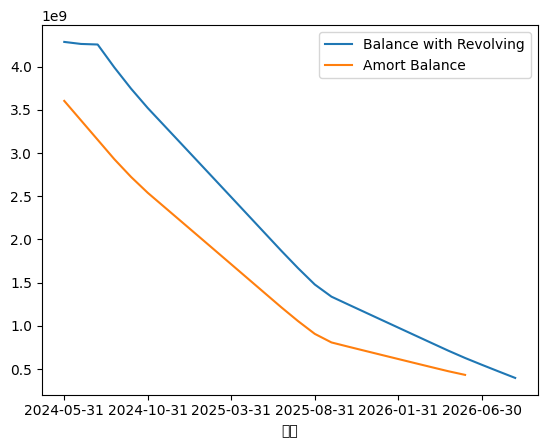

In [203]:
rdf.join(adf).plot()